Missing values in the dataset:
ID                                      0
Age                                     0
Sex                                     0
Chest Pain Type                         0
Resting Blood Pressure                  0
Cholesterol                             0
Fasting Blood Sugar                     0
Resting Electrocardiographic Results    0
Max Heart Rate Achieved                 0
Exercise Induced Angina                 0
Oldpeak                                 0
Slope of Peak Exercise ST Segment       0
Number of Major Vessels                 0
Thalassemia                             2
Heart Disease (Target)                  2
dtype: int64

Checking for infinity values in the dataset:
ID                                      0
Age                                     0
Sex                                     0
Chest Pain Type                         0
Resting Blood Pressure                  0
Cholesterol                             0
Fasting Blood Sugar         

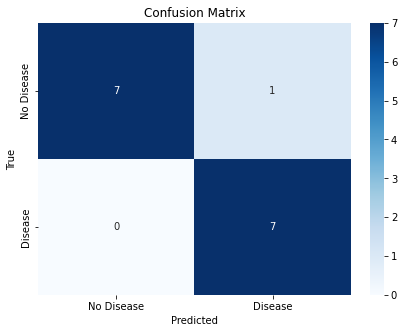

In [15]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns  # Import seaborn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

# Step 1: Load the data
data = pd.read_csv("heart disease.csv")  # Make sure the file path is correct

# Step 2: Check for missing values
print("Missing values in the dataset:")
print(data.isnull().sum())  # Check for missing values

# Drop rows with missing values (or you can fill them with data.fillna())
data = data.dropna()

# Step 3: Check for infinity values
print("\nChecking for infinity values in the dataset:")
print(np.isinf(data).sum())  # Check for infinity

# Replace infinity values with NaN and then drop them (if needed)
data.replace([np.inf, -np.inf], np.nan, inplace=True)
data.dropna(inplace=True)

# Step 4: Encode categorical variables if necessary
# Example: Convert 'Sex' column to binary: 0 = Male, 1 = Female
data['Sex'] = data['Sex'].map({'M': 0, 'F': 1})  # Adjust this mapping based on your dataset

# Convert 'Chest Pain Type' to numerical encoding (adjust based on dataset)
data['Chest Pain Type'] = data['Chest Pain Type'].map({1: 0, 2: 1, 3: 2, 4: 3})

# Ensure that all columns are numeric after encoding
print("\nData types after conversion:")
print(data.dtypes)

# Step 5: Split the dataset into features (X) and target (y)
X = data[['Age', 'Chest Pain Type', 'Resting Blood Pressure', 'Cholesterol', 'Max Heart Rate Achieved']]  # Features
y = data['Heart Disease (Target)']  # Target variable (Heart Disease)

# Step 6: Check for compatibility of data types
print("\nChecking the shape and types of X and y:")
print(X.shape)  # Ensure X is a 2D array
print(y.shape)  # Ensure y is a 1D array

# Check if there are any columns that are not numeric in X
print("\nColumns in X that are not numeric:")
print(X.select_dtypes(exclude=[np.number]).columns)

# Step 7: Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 8: Initialize and train the Logistic Regression model
model = LogisticRegression(max_iter=1000)

# Ensure that X_train is numeric and free from any non-numeric data before fitting
print("\nChecking if X_train has non-numeric columns:")
print(X_train.select_dtypes(exclude=[np.number]).columns)

# Step 9: Fit the model
try:
    model.fit(X_train, y_train)
    print("\nModel fitting completed successfully!")
except Exception as e:
    print(f"\nError during model fitting: {e}")

# Step 10: Make predictions on the test data
y_pred = model.predict(X_test)

# Step 11: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy*100:.2f}%")

# Confusion matrix
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Step 12: Plotting the confusion matrix
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['No Disease', 'Disease'], 
            yticklabels=['No Disease', 'Disease'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
